<a href="https://colab.research.google.com/github/Neavy1/AnyoneAI/blob/main/7_1_1_PRACTICE_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

1. Missing data
2. Feature Normalization
3. Categorical Encoding
4. Transformations
5. Discretization
6. Outliers
7. Optional: Date and Time

---
## 1. Missing data

In [9]:
import pylab
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [5]:
!gdown "160gAZCXP4ru26txQo-MYJISet-ASMNR9"

titanic = pd.read_csv('titanic.csv')

Downloading...
From: https://drive.google.com/uc?id=160gAZCXP4ru26txQo-MYJISet-ASMNR9
To: /content/titanic.csv
100% 61.2k/61.2k [00:00<00:00, 4.92MB/s]


In [6]:
data0 = titanic.copy()

In [7]:
data0.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
print(f'Percentage of data without missing values: {data0.dropna().shape[0]/ np.float64(data0.shape[0])}')

Percentage of data without missing values: 0.2053872053872054


In [14]:
data1 = titanic.copy()

In [15]:
data1.isna().mean()

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**TODO:** `Age` is a continuous variable. First, we will check the distribution of `age` variable.

**TODO:** We can see that the `age` distribution is skewed. So, we will use the median imputation.

---
## 2. Feature Normalization

In [17]:
data2 = titanic.copy()
median = data2.Age.median()
data2['Age'] = data2['Age'].fillna(median)
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**TODO:** We are going to normalize the Age in two ways using MinMax Scaler and Standard Scaler

---
## 3. Categorical Encoding

### One-Hot Encoding

In [27]:
data3 = titanic.copy()

In [28]:
data3['Sex'].head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [29]:
data3_oh = pd.get_dummies(data3['Sex'])
data3_oh.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('female').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['male'].value_counts()
    for x_label, grp in _df_2.groupby('female')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('female')
_ = plt.ylabel('male')

In [30]:
data3 = data3.join(data3_oh)
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True


We can see that we only need 1 of the 2 dummy variables to represent the original categorical variable `Sex`. Any of the 2 will do the job, and it doesn't matter which one we select, since they are equivalent. Therefore, to encode a categorical variable with 2 labels, we need only 1 dummy variable.

To extend this concept, to encode categorical variable with k labels, we need k-1 dummy variables. We can achieve this task as follows:

**TODO:** Obtaining k-1 labels on __Sex__ and __Embarked__ features

In [44]:
import pandas as pd
# Obtaining k-1 labels on Sex and Embarked features
data3 = titanic.copy()

# Sex
data3 = pd.get_dummies(data3, columns=['Sex'], drop_first=True)

# Embarked
data3 = pd.get_dummies(data3, columns=['Embarked'], drop_first=True)

data3.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


**TODO:** Investigate Scikt-Learn API [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [46]:
# import pandas as pd
# Supongamos que 'data3' es tu DataFrame original
# encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' elimina una columna redundante
# Aplicar OneHotEncoder a las columnas categóricas
# encoded_cols = encoder.fit_transform(data3[['Sex_male', 'Embarked_Q']])
# Convertir a DataFrame con nombres de columnas adecuados
# encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Sex_male', 'Embarked_Q']))
# Concatenar con el DataFrame original, eliminando las columnas originales
# data3 = pd.concat([data3.drop(['Sex_male', 'Embarked_Q'], axis=1), encoded_df], axis=1)
# Mostrar el resultado
# print(data3.head()) Haz esto y comenta lo que sea necesario

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data3' is your original DataFrame (as defined in the previous code)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' removes a redundant column

# Apply OneHotEncoder to the categorical columns
encoded_cols = encoder.fit_transform(data3[['Sex_male', 'Embarked_Q']])

# Convert to DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Sex_male', 'Embarked_Q']))

# Concatenate with the original DataFrame, removing the original columns
data3 = pd.concat([data3.drop(['Sex_male', 'Embarked_Q'], axis=1), encoded_df], axis=1)

# Display the result
print(data3.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Embarked_S  Sex_male_True  Embarked_Q_True  
0         A/5 21171   7.2500   NaN        True            1.0              0.0  
1          PC 17599  71.2833   C85       False            0.0              0.0  
2  STON/O2. 3101282   7.9250   NaN        True            0.0              0.0  
3 

---
## 4 Transformations

In [34]:
data4 = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
data4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data4['Age'] = data4['Age'].fillna(data4.Age.median())
data4.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Example: Logarithmic transformation

In [ ]:
data4['Age_log'] = np.log(data4.Age)

**TODO:** Convert Age to months

---
## 5. Discretization

**TODO:** Apply binning to __Age__ and plot Age count per bin

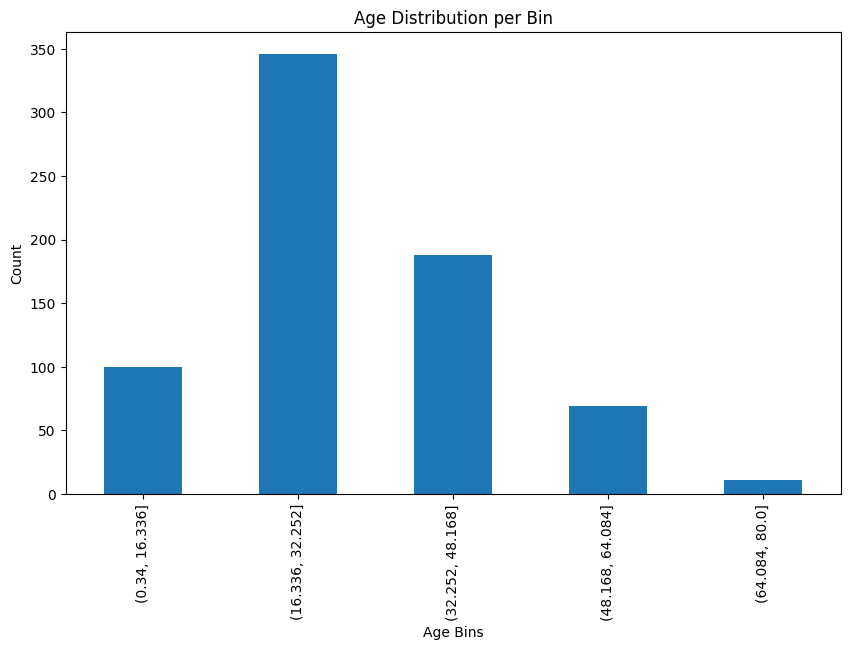

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming data4 DataFrame from the previous code block is available.
# If not, load the data and perform the necessary preprocessing steps.

# Binning Age into 5 equal-width bins
data4['Age_binned'] = pd.cut(data4['Age'], bins=5)

# Plotting the Age count per bin
plt.figure(figsize=(10, 6))
data4['Age_binned'].value_counts(sort=False).plot(kind='bar')
plt.title('Age Distribution per Bin')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.show()


---
## 6. Outliers

**TODO:** Load the numerical variables of the Titanic Dataset

In [37]:
# Suponiendo que el DataFrame data4 del bloque de código anterior está disponible.
# Si no, carga los datos y realiza los pasos de preprocesamiento necesarios.

# Asegúrate de que la columna 'Age_log' exista antes de seleccionarla
# Esta línea estaba previamente en la Celda 31, pero necesita moverse aquí.
data4['Age_log'] = np.log(data4.Age) # Creando la columna 'Age_log' primero

# Seleccionar columnas numéricas
numerical_cols = ['Age', 'Fare', 'Survived', 'Age_log']  # Agrega otras columnas numéricas si es necesario
numerical_data = data4[numerical_cols]

# Mostrar las primeras filas de los datos numéricos
print(numerical_data.head())

    Age     Fare  Survived   Age_log
0  22.0   7.2500         0  3.091042
1  38.0  71.2833         1  3.637586
2  26.0   7.9250         1  3.258097
3  35.0  53.1000         1  3.555348
4  35.0   8.0500         0  3.555348


**TODO:** We can see that `Age` and `Fare` are continuous variables. So, you'll need to limit outliers on those variables.

In [38]:
# Calculate quartiles for 'Age' and 'Fare'
age_q1 = numerical_data['Age'].quantile(0.25)
age_q3 = numerical_data['Age'].quantile(0.75)
age_iqr = age_q3 - age_q1

fare_q1 = numerical_data['Fare'].quantile(0.25)
fare_q3 = numerical_data['Fare'].quantile(0.75)
fare_iqr = fare_q3 - fare_q1

# Define outlier limits
age_upper_limit = age_q3 + 1.5 * age_iqr
age_lower_limit = age_q1 - 1.5 * age_iqr

fare_upper_limit = fare_q3 + 1.5 * fare_iqr
fare_lower_limit = fare_q1 - 1.5 * fare_iqr

# Filter out outliers
numerical_data_filtered = numerical_data[
    (numerical_data['Age'] >= age_lower_limit) &
    (numerical_data['Age'] <= age_upper_limit) &
    (numerical_data['Fare'] >= fare_lower_limit) &
    (numerical_data['Fare'] <= fare_upper_limit)
]

# Display the first few rows of the filtered data
print(numerical_data_filtered.head())

# You can now use numerical_data_filtered for further analysis
# or replace the original numerical_data with this filtered version.
# For example:
# data4 = data4[data4.index.isin(numerical_data_filtered.index)]


    Age     Fare  Survived   Age_log
0  22.0   7.2500         0  3.091042
2  26.0   7.9250         1  3.258097
3  35.0  53.1000         1  3.555348
4  35.0   8.0500         0  3.555348
6  54.0  51.8625         0  3.988984


**TODO:** Plot histograms on __Age__ and __Fare__

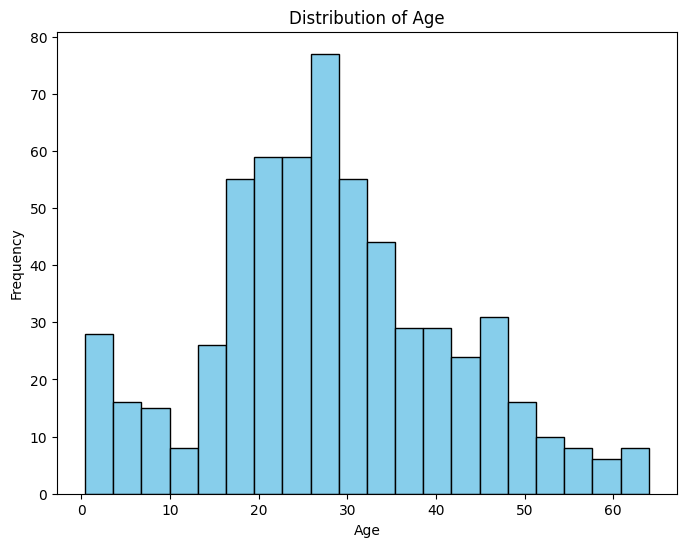

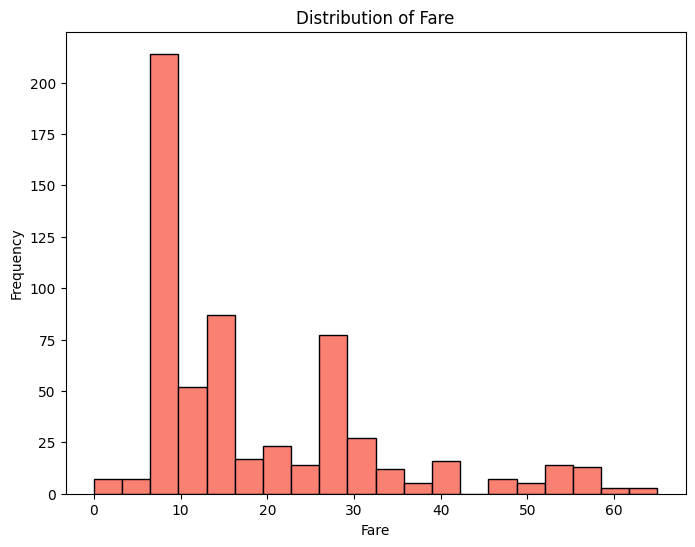

In [39]:
import matplotlib.pyplot as plt

# Plot histogram for 'Age'
plt.figure(figsize=(8, 6))
plt.hist(numerical_data_filtered['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'Fare'
plt.figure(figsize=(8, 6))
plt.hist(numerical_data_filtered['Fare'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


**TODO:** __Age__ is quite Gaussian and __Fare__ is skewed, so you will use the Gaussian assumption for __Age__, and the interquantile range for __Fare__.

### Find outliers

---
## 7. Optional: Date and Time

In some machine learning problems, temporary features appear, such as dates, times, etc. That type of data must be treated in a particular way.

**NOTE:** There is an area of machine learning where time data becomes critical, time series.

In [40]:
!gdown "1FFgCIxCy-DLV_mlzyFk_RolEgcr8IDNQ"

data7 = pd.read_csv('stock_prices.csv')
data7.head()

Downloading...
From: https://drive.google.com/uc?id=1FFgCIxCy-DLV_mlzyFk_RolEgcr8IDNQ
To: /content/stock_prices.csv
100% 20.5k/20.5k [00:00<00:00, 49.5MB/s]


,Date,Close Price,High Price,Low Price,Open Price,Volume
0,2021-12-10 05AM,48246.57,48359.35,48051.08,48170.66,827.39761
1,2021-12-10 06AM,47847.59,48430.00,47810.81,48249.78,1296.18883
2,2021-12-10 07AM,47694.62,48037.48,47550.00,47847.59,2299.85298
3,2021-12-10 08AM,48090.35,48169.06,47587.39,47694.62,1371.25447
4,2021-12-10 09AM,48366.37,48495.00,47869.80,48090.35,1232.30238


**TODO:** Parse the dates, currently coded as strings, into datetime.

**TIP:** Investigate pandas [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and take care of date format!

**TODO:** Extract Month from Date

**TODO:** Convert Day to numeric from 1-31

**TODO:** Convert Day of the week to numeric from 0 to 6

**TODO:** Convert Day of the week to name

**TODO:** Was on Weekend? Generate a binary feature that indicates if the date corresponds to a weekend day.

**TODO:** Extract year

**TODO:** Extract hour